<a href="https://colab.research.google.com/github/Avi0095/Machine-Learning/blob/main/9_svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


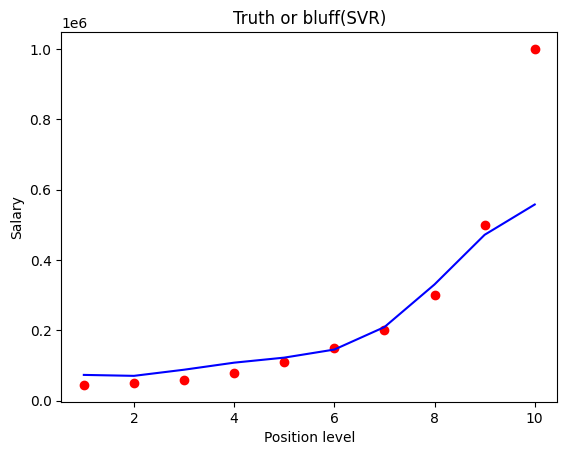

/tmp/ipython-input-3392259214.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(Sc_x.inverse_transform(x)),max(Sc_x.inverse_transform(x)),0.1)


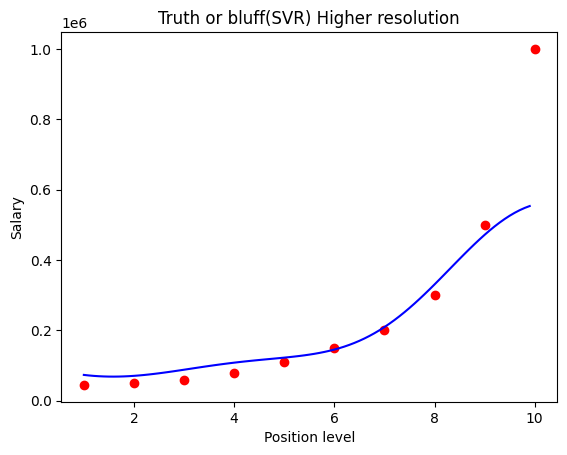

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing the dataset
dataset = pd.read_csv('position_Salaries.csv')

x = dataset.iloc[:, 1:-1].values #we require just numerical data
y = dataset.iloc[:, -1].values
print(x)
print(y)
y=y.reshape(len(y),1)# for making a 2D array and feature scaling
print(y)

#feature scaling
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
SC_y=StandardScaler()
x=Sc_x.fit_transform(x)
y=SC_y.fit_transform(y)

#training the SVR model on whole dataset
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')#result base function
regressor.fit(x,y)#correlation between x and y
#predicting a new result
SC_y.inverse_transform(regressor.predict(Sc_x.transform([[6.5]])).reshape(-1,1))
#Visualizing the svr result
plt.scatter(Sc_x.inverse_transform(x),SC_y.inverse_transform(y),color='red')
plt.plot(Sc_x.inverse_transform(x),SC_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')
plt.title('Truth or bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#visualizing the SVR  result(higher resolution and smooth curve)
x_grid=np.arange(min(Sc_x.inverse_transform(x)),max(Sc_x.inverse_transform(x)),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(Sc_x.inverse_transform(x),SC_y.inverse_transform(y),color='red')
plt.plot(x_grid,SC_y.inverse_transform(regressor.predict(Sc_x.transform(x_grid)).reshape(-1,1)),color='blue')
plt.title('Truth or bluff(SVR) Higher resolution')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()